In [1]:
import pandas as pd

In [2]:
marvel = pd.read_csv('Data/MarvelComicCaracters.csv', sep=';')

# Описание данных

- name — оригинальное имя персонажа вселенной Marvel
- align — принадлежность персонажа к доброй/злой/нейтральной стороне
- eye — описание глаз персонажа
- hair — описание волос персонажа
- sex — пол персонажа
- appearances — количество появлений персонажа
- first_appearance — год первого появления персонажа

In [3]:
marvel.head(n=3)

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0


# Задания

### Какой тип графика из перечисленных наиболее удобен для описания распределения переменной `appearances`? Выберите один верный ответ.

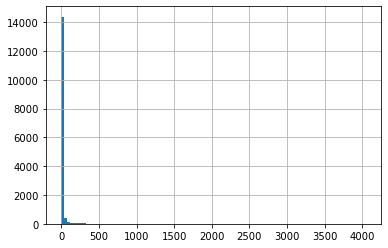

In [4]:
marvel['appearances'].hist(bins=100);

### Укажите, верно ли следующее утверждение: переменную `name` можно изобразить на интерпретируемом графике.

### По переменной `align` была построена частотная таблица. Укажите, какие ошибки были допущены в таблице. Чтобы проверить ее, постройте таблицу сами, используя удобную вам программу. Выберите один верный ответ.



In [11]:
marvel['align'].value_counts(dropna=True)

Злой персонаж           6720
Добрый персонаж         4636
Нейтральный персонаж    2208
Name: align, dtype: int64

### Определите три наиболее часто встречающих цвета глаз персонажей, выберите из данных только их и заполните частотную таблицу по переменной eye. В вариантах ответов представлены числа, которые могут быть записаны в таблицу. Выберите один верный ответ.

In [14]:
pd.DataFrame(marvel['eye'].value_counts()).head(n=3).values

array([[1962],
       [1924],
       [ 613]], dtype=int64)

### Укажите, верно ли следующее утверждение: у мужских персонажей чаще всего встречаются темно-карие глаза.

In [23]:
marvel.loc[marvel['sex'] == 'Мужской персонаж', 'eye'].mode() == 'Темно-карие глаза'

0    True
dtype: bool

### Постройте частотную таблицу для персонажей женского пола по переменной `eye`. У скольких из них золотые глаза? Введите ответ в виде целого числа.

In [35]:
marvel.loc[(marvel['sex'] == 'Женский персонаж') & (marvel['eye'] == 'Золотые глаза'), 'name'].nunique()

3

### Сколько раз появлялся добрый персонаж с пурпурными глазами? Введите ответ в виде целого числа.


In [75]:
marvel.loc[(marvel['align'] == 'Добрый персонаж') & (marvel['eye'] == 'Пурпурные глаза'), 'appearances'].sum()

21.0

### Были выбраны самые часто встречающиеся цвета глаз персонажей. Далее, только по этим данным, построена столбчатая диаграмма. Что можно сказать, основываясь только на графике? Выберите один верный ответ.

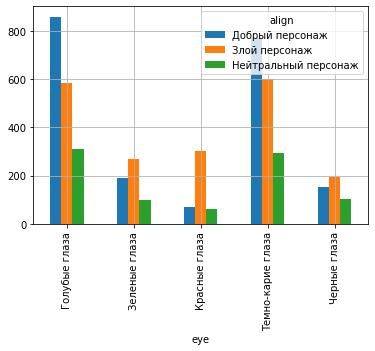

In [54]:
marvel \
    .loc[marvel['eye'].isin(['Голубые глаза', 'Темно-карие глаза','Красные глаза', 'Зеленые глаза','Черные глаза']), :] \
    .pivot_table(index='eye', columns='align', values='name', aggfunc='count') \
    .plot(kind='bar', grid=True);

### Укажите, верно ли следующее утверждение: больше всего персонажей в первый раз появилось в 1993 году.

In [61]:
marvel['first_appearance'].mode() == 1993

0    True
dtype: bool

### Сколько процентов (от общего числа персонажей) составляют мужские персонажи, которые появлялись больше 100 раз? В ответ запишите число (процент от 0 до 100), округлите до целого.

In [72]:
round(
    marvel[(marvel['sex'] == 'Мужской персонаж') & (marvel['appearances'] > 100)].shape[0] / marvel['name'].nunique() * 100
)

2

In [66]:
for i in marvel.columns:
    print(i, marvel[i].unique(), '\n')

name ['Spider-Man (Peter Parker)' 'Captain America (Steven Rogers)'
 'Wolverine (James \\"Logan\\" Howlett)' ...
 'Tinkerer (Skrull) (Earth-616)' 'TK421 (Spiderling) (Earth-616)'
 'Yologarch (Earth-616)'] 

align ['Добрый персонаж' 'Нейтральный персонаж' 'Злой персонаж' nan] 

eye ['Карие глаза' 'Голубые глаза' 'Темно-карие глаза' 'Зеленые глаза'
 'Серые глаза' 'Желтые глаза' 'Золотые глаза' 'Красные глаза'
 'Черные глазные яблоки' 'Янтарные глаза' 'Разноцветные глаза' nan
 'Черные глаза' 'Белые глаза' 'Оранжевые глаза' 'Серебристые глаза'
 'Фиолетовые глаза' 'Розовые глаза' 'Один глаз' 'Лиловые глаза'
 'Много глаз' 'Пурпурные глаза' 'Желтые глазные яблоки' 'Нет глаз'
 'Фасеточные глаза'] 

hair ['Каштановые волосы' 'Белые волосы' 'Черные волосы' 'Русые волосы'
 'Без волос' nan 'Серебристые волосы' 'Фиолетовые волосы'
 'Светло-розовые волосы' 'Зеленые волосы' 'Рыжевато-соломенные волосы'
 'Золотые волосы' 'Оранжевые волосы' 'Розовые волосы'
 'Разноцветные волосы' 'Желтые волосы' 'Светл